Pull data from Google BigQuery into a Pandas DataFrame.

In [ ]:
from google.cloud import bigquery
import pandas as pd

client = bigquery.Client()

query = """
SELECT *
FROM `churn_analytics.customer_features`
"""

df = client.query(query).to_dataframe()
        
df.head()

d:\Python\PythonCode\venv\Lib\site-packages\google\cloud\bigquery\table.py:1994: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


,customer_id,churn_flag,is_male,senior_citizen,has_partner,has_dependents,tenure,tenure_group,phone_service,multiple_lines,...,tech_support,streaming_tv,streaming_movies,service_count,contract,paperless_billing,payment_method,monthly_charges,total_charges,avg_monthly_spend
0,2923-ARZLG,0,1,0,1,1,0,0-1_year,1,0,...,0,0,0,1,One year,1,Mailed check,19.70,NaN,NaN
1,7644-OMVMY,0,1,0,1,1,0,0-1_year,1,0,...,0,0,0,1,Two year,0,Mailed check,19.85,NaN,NaN
2,2520-SGTTA,0,0,0,1,1,0,0-1_year,1,0,...,0,0,0,1,Two year,0,Mailed check,20.00,NaN,NaN
3,3115-CZMZD,0,1,0,0,1,0,0-1_year,1,0,...,0,0,0,1,Two year,0,Mailed check,20.25,NaN,NaN
4,3213-VVOLG,0,1,0,1,1,0,0-1_year,1,1,...,0,0,0,2,Two year,0,Mailed check,25.35,NaN,NaN


Churn rate overview

<ins>df.isna().mean().sort_values(ascending=False)</ins> --> For each column, calculate what fraction of rows are missing, and sort the columns from most missing to least missing.

In [3]:
df.info()
df.isna().mean().sort_values(ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   churn_flag         7043 non-null   Int64  
 2   is_male            7043 non-null   Int64  
 3   senior_citizen     7043 non-null   Int64  
 4   has_partner        7043 non-null   Int64  
 5   has_dependents     7043 non-null   Int64  
 6   tenure             7043 non-null   Int64  
 7   tenure_group       7043 non-null   object 
 8   phone_service      7043 non-null   Int64  
 9   multiple_lines     7043 non-null   Int64  
 10  internet_service   7043 non-null   Int64  
 11  online_security    7043 non-null   Int64  
 12  online_backup      7043 non-null   Int64  
 13  device_protection  7043 non-null   Int64  
 14  tech_support       7043 non-null   Int64  
 15  streaming_tv       7043 non-null   Int64  
 16  streaming_movies   7043 

total_charges        0.001562
avg_monthly_spend    0.001562
customer_id          0.000000
churn_flag           0.000000
has_partner          0.000000
has_dependents       0.000000
is_male              0.000000
senior_citizen       0.000000
tenure_group         0.000000
tenure               0.000000
phone_service        0.000000
multiple_lines       0.000000
online_backup        0.000000
device_protection    0.000000
internet_service     0.000000
online_security      0.000000
streaming_tv         0.000000
tech_support         0.000000
streaming_movies     0.000000
service_count        0.000000
paperless_billing    0.000000
contract             0.000000
monthly_charges      0.000000
payment_method       0.000000
dtype: float64

In [4]:
df['churn_flag'].value_counts(normalize=True)

churn_flag
0    0.73463
1    0.26537
Name: proportion, dtype: Float64

In [5]:
df.groupby('contract')['churn_flag'].mean().sort_values()

contract
Two year          0.028319
One year          0.112695
Month-to-month    0.427097
Name: churn_flag, dtype: Float64

In [6]:
df.groupby('tenure_group')['churn_flag'].mean().sort_values()

tenure_group
4+_years     0.096396
2-4_years    0.208744
1-2_years    0.295129
0-1_year     0.482842
Name: churn_flag, dtype: Float64

In [7]:
df.groupby('payment_method')['churn_flag'].mean().sort_values()

payment_method
Credit card (automatic)      0.152431
Bank transfer (automatic)    0.167098
Mailed check                 0.191067
Electronic check             0.452854
Name: churn_flag, dtype: Float64

In [8]:
df.groupby('internet_service')['churn_flag'].mean().sort_values()

internet_service
0     0.07405
1    0.318289
Name: churn_flag, dtype: Float64

Feature distributions

Numerical Feature Analysis

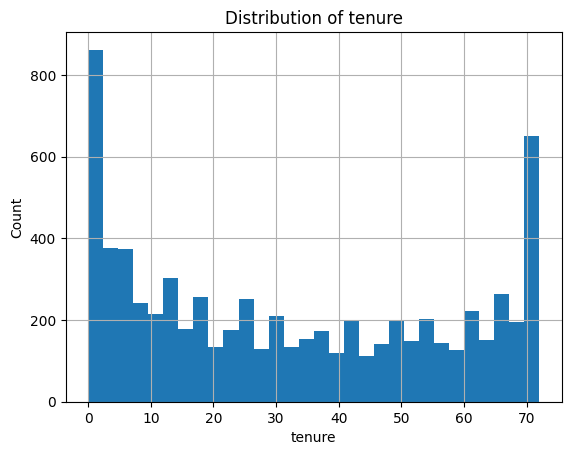

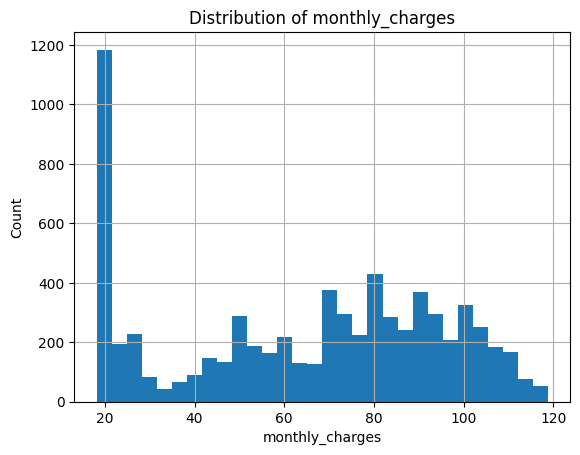

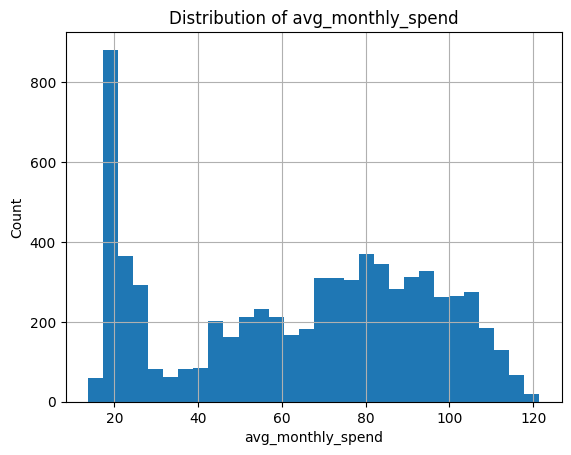

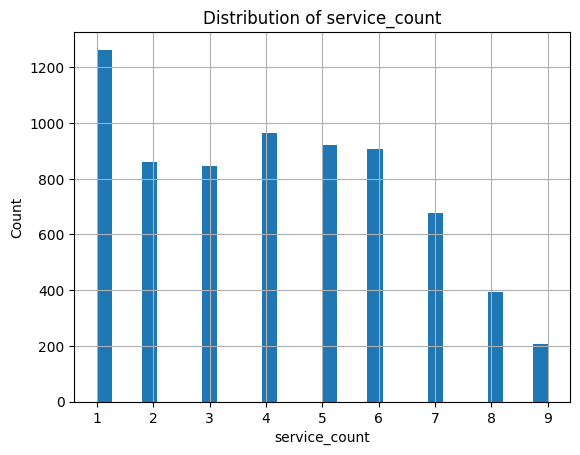

In [9]:
num_features = [
    "tenure",
    "monthly_charges",
    "avg_monthly_spend",
    "service_count"
]

import matplotlib.pyplot as plt

for col in num_features:
    plt.figure()
    df[col].hist(bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()


<Figure size 640x480 with 0 Axes>

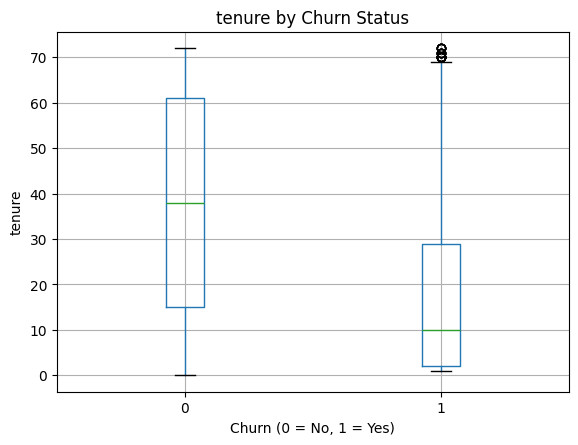

<Figure size 640x480 with 0 Axes>

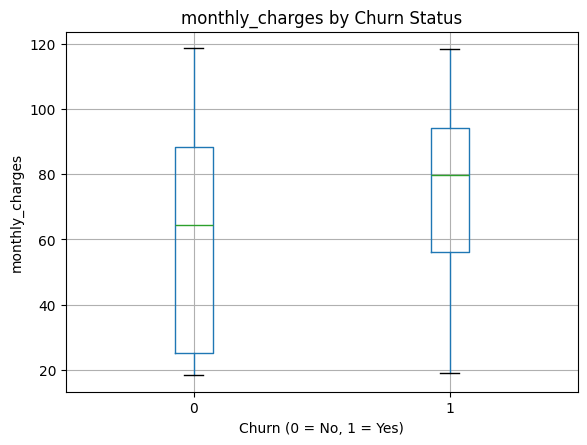

<Figure size 640x480 with 0 Axes>

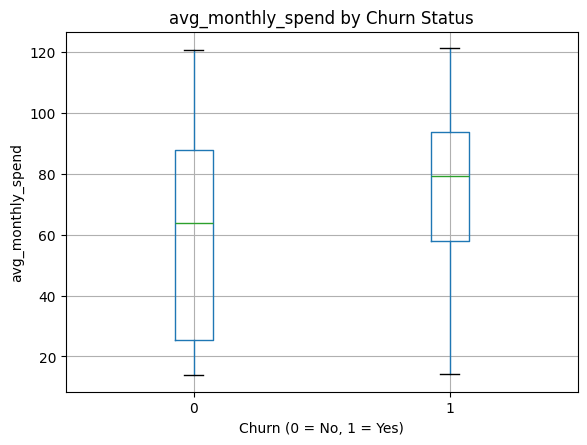

<Figure size 640x480 with 0 Axes>

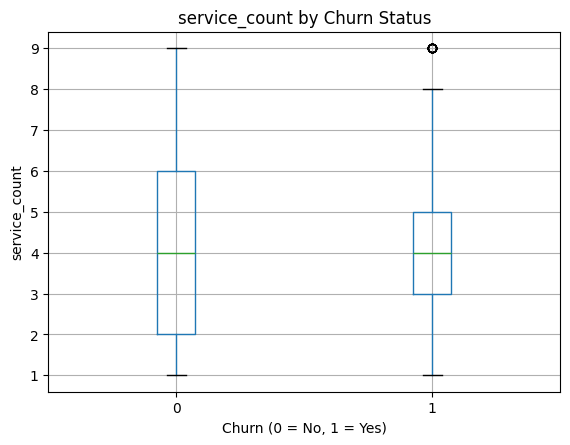

In [10]:
for col in num_features:
    plt.figure()
    df.boxplot(column=col, by="churn_flag")
    plt.title(f"{col} by Churn Status")
    plt.suptitle("")
    plt.xlabel("Churn (0 = No, 1 = Yes)")
    plt.ylabel(col)
    plt.show()

### Early Business Insights

- **Tenure:** Customers with shorter tenure show significantly higher churn rates, indicating risk during the onboarding phase.
- **Monthly Charges:** Monthly charges also have an impact in churn, with around 75% of customers who pay a monthly charge above 60 churning, while around 50% of customers under 60 didn't churn.
- **Service Count:** Half of the customers who churned had from 3 to 5 services contracted, while half of the ones who didn't have from 2 to 6, so looks like there's a slight trend to remain when customers have more services contracted (which would make sense, since you expect a satisfied customer to contract more services).

In [11]:
df.groupby("churn_flag")[num_features].mean()

,tenure,monthly_charges,avg_monthly_spend,service_count
churn_flag,,,,
0,37.569965,61.265124,61.312024,4.173174
1,17.979133,74.441332,74.433154,4.071696


In [12]:
df.groupby("churn_flag")[num_features].median()

,tenure,monthly_charges,avg_monthly_spend,service_count
churn_flag,,,,
0,38.0,64.425,64.040385,4.0
1,10.0,79.650,79.312500,4.0


In [13]:
df[num_features + ["churn_flag"]].corr()["churn_flag"].sort_values(ascending=False)

churn_flag           1.000000
monthly_charges      0.193356
avg_monthly_spend    0.192033
service_count       -0.019375
tenure              -0.352229
Name: churn_flag, dtype: float64

Categorical Feature Analysis

In [15]:
cat_features = [
    "contract",
    "payment_method",
    "internet_service",
    "is_male"
]

for col in cat_features:
    churn_rate = (
        df.groupby(col)["churn_flag"]
        .mean()
        .sort_values(ascending=False)
    )

    display(churn_rate)


contract
Month-to-month    0.427097
One year          0.112695
Two year          0.028319
Name: churn_flag, dtype: Float64

payment_method
Electronic check             0.452854
Mailed check                 0.191067
Bank transfer (automatic)    0.167098
Credit card (automatic)      0.152431
Name: churn_flag, dtype: Float64

internet_service
1    0.318289
0     0.07405
Name: churn_flag, dtype: Float64

is_male
0    0.269209
1    0.261603
Name: churn_flag, dtype: Float64

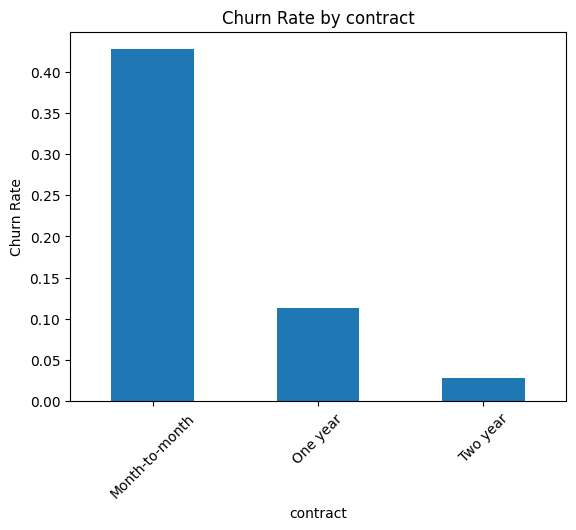

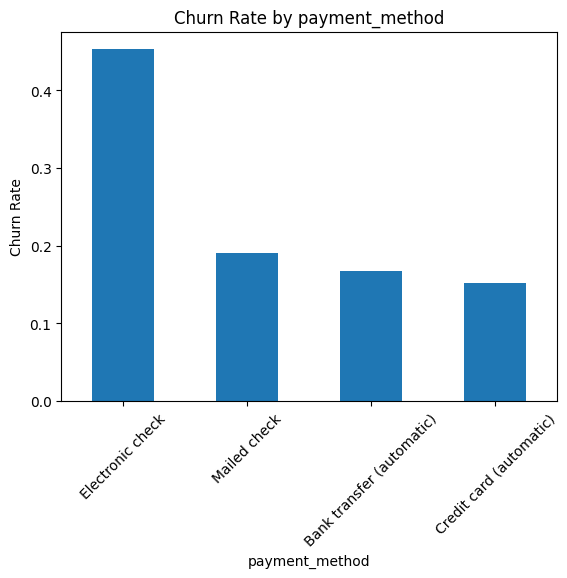

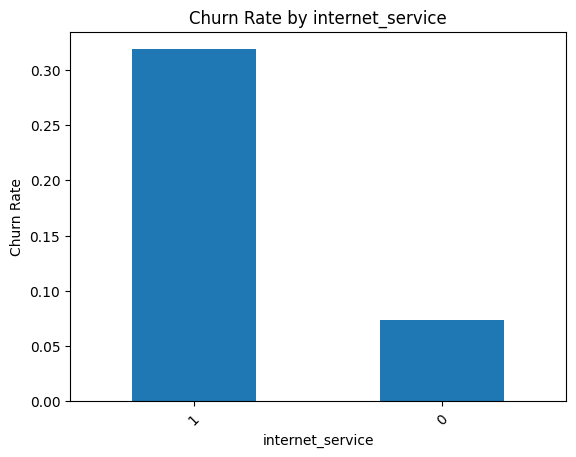

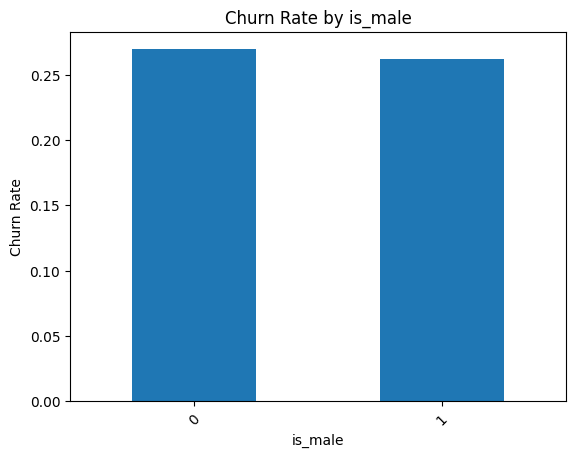

In [17]:
import matplotlib.pyplot as plt

for col in cat_features:
    churn_rate = df.groupby(col)["churn_flag"].mean().sort_values(ascending=False)

    plt.figure()
    churn_rate.plot(kind="bar")
    plt.title(f"Churn Rate by {col}")
    plt.ylabel("Churn Rate")
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.show()

### Key Categorical Insights

- **Contract Type:** Month-to-month customers exhibit the highest churn rate, while long-term contracts show significantly lower churn.
- **Payment Method:** Customers using electronic check have higher churn compared to those using mailed check and automatic payments.
- **Internet Service:** Users who have a contracted internet service show much higher churn rate than those who haven't.
- **Gender:** No meaningful difference in churn rate is observed between genders.

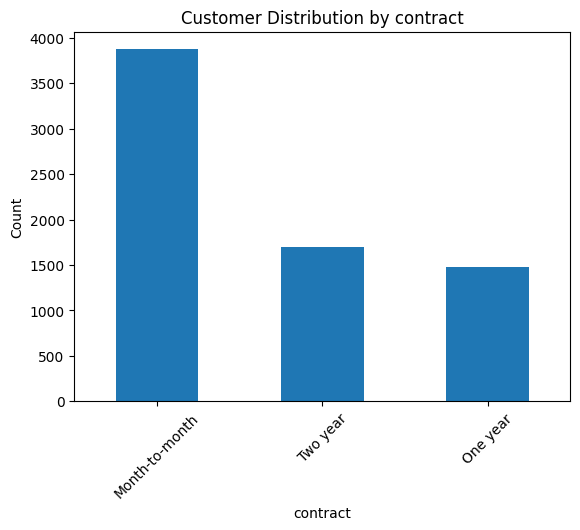

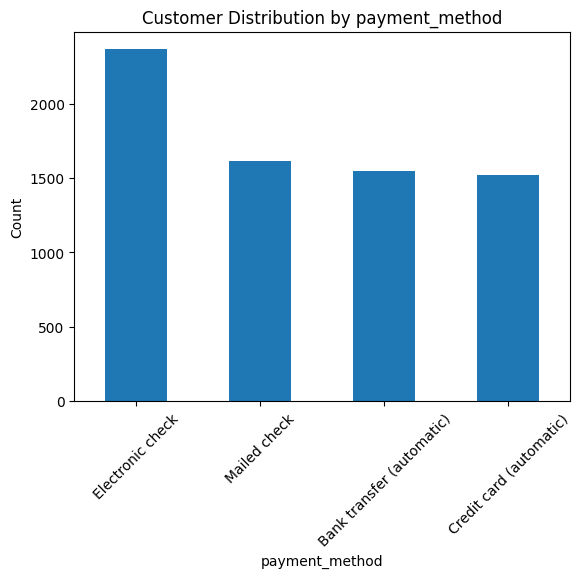

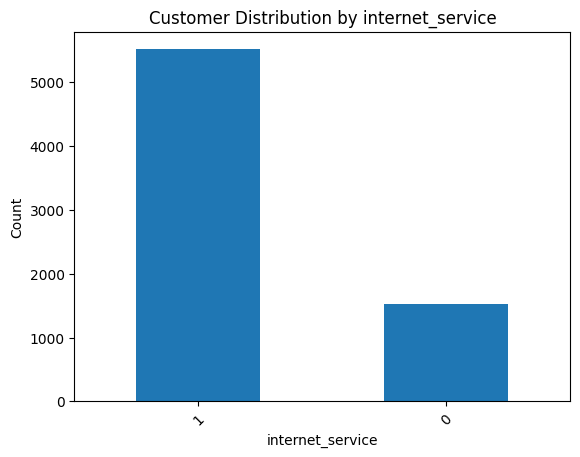

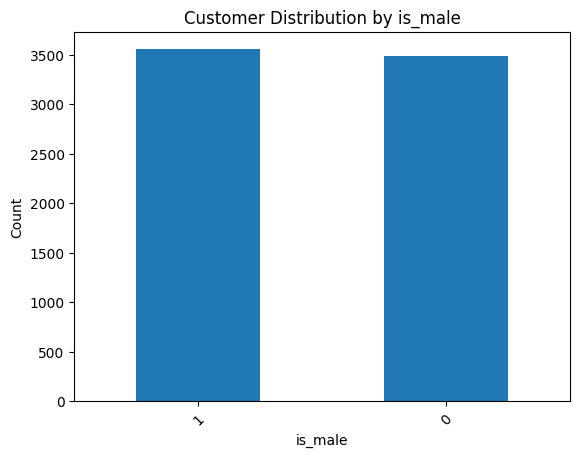

In [18]:
for col in cat_features:
    plt.figure()
    df[col].value_counts().plot(kind="bar")
    plt.title(f"Customer Distribution by {col}")
    plt.ylabel("Count")
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.show()